In [88]:
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import json
import zipfile
%pylab inline

if os.getenv ('PUI2017') is None:
    print ("Must set env variable PUI2017")
if os.getenv ('PUIDATA') is None:
    print ("Must set env variable PUI2017")

pylab.style.use('ggplot')

Populating the interactive namespace from numpy and matplotlib
Must set env variable PUI2017


# IDEA:
## Women are less likely than men to choose biking during the night (9:00pm - 6:00am).

# NULL HYPOTHESIS:
## The ratio of man biking at night over man biking during the whole day is _the same_ or _less_  than the ratio of woman biking at night to woman biking during the day.

# _$H_0$_ : $\frac{W_{\mathrm{night}}}{W_{\mathrm{day}}} >= \frac{M_{\mathrm{night}}}{M_{\mathrm{day}}}$
# _$H_1$_ : $\frac{W_{\mathrm{night}}}{W_{\mathrm{day}}} < \frac{M_{\mathrm{night}}}{M_{\mathrm{day}}}$


## I will use a significance level  $\alpha=0.05$

#### which means i want the probability of getting a result at least as significant as mine to be less then 5%

## I am starting with a single month of data:  reading data from citibike csv file from MAR 2017

In [82]:
!ls /gws/open/Student/citibike/

201307-citibike-tripdata.zip  201508-citibike-tripdata.zip
201308-citibike-tripdata.zip  201509-citibike-tripdata.zip
201309-citibike-tripdata.zip  201510-citibike-tripdata.zip
201310-citibike-tripdata.zip  201511-citibike-tripdata.zip
201311-citibike-tripdata.zip  201512-citibike-tripdata.zip
201312-citibike-tripdata.zip  201601-citibike-tripdata.zip
201401-citibike-tripdata.zip  201602-citibike-tripdata.zip
201402-citibike-tripdata.zip  201603-citibike-tripdata.zip
201403-citibike-tripdata.zip  201604-citibike-tripdata.zip
201404-citibike-tripdata.zip  201605-citibike-tripdata.zip
201405-citibike-tripdata.zip  201606-citibike-tripdata.zip
201406-citibike-tripdata.zip  201607-citibike-tripdata.zip
201407-citibike-tripdata.zip  201608-citibike-tripdata.zip
201408-citibike-tripdata.zip  201609-citibike-tripdata.zip
201409-citibike-tripdata.zip  201610-citibike-tripdata.zip
201410-citibike-tripdata.zip  201611-citibike-tripdata.zip
201411-citibike-tripdata.zip  201612-citibike-tripdata.z

In [83]:
Zip = zipfile.ZipFile("/gws/open/Student/citibike/201703-citibike-tripdata.csv.zip")
Zip.extractall(path=(os.getenv('PUIDATA')+'/citibike'))

In [84]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + "citibike" + "/"+ '201703-citibike-tripdata.csv')

df['time'] = pd.to_datetime(df['Start Time'])

df.head()

,Trip Duration,Start Time,Stop Time,Start Station ID,Start Station Name,Start Station Latitude,Start Station Longitude,End Station ID,End Station Name,End Station Latitude,End Station Longitude,Bike ID,User Type,Birth Year,Gender,time
0,1893,2017-03-01 00:00:32,2017-03-01 00:32:06,2009,Catherine St & Monroe St,40.711174,-73.996826,527,E 33 St & 2 Ave,40.744023,-73.976056,27291,Subscriber,1973.0,2,2017-03-01 00:00:32
1,223,2017-03-01 00:01:09,2017-03-01 00:04:53,127,Barrow St & Hudson St,40.731724,-74.006744,284,Greenwich Ave & 8 Ave,40.739017,-74.002638,19387,Subscriber,1985.0,2,2017-03-01 00:01:09
2,1665,2017-03-01 00:01:27,2017-03-01 00:29:12,174,E 25 St & 1 Ave,40.738177,-73.977387,307,Canal St & Rutgers St,40.714275,-73.989900,15809,Subscriber,1988.0,1,2017-03-01 00:01:27
3,100,2017-03-01 00:01:29,2017-03-01 00:03:10,316,Fulton St & William St,40.709560,-74.006536,306,Cliff St & Fulton St,40.708235,-74.005301,18956,Subscriber,1991.0,1,2017-03-01 00:01:29
4,1229,2017-03-01 00:01:33,2017-03-01 00:22:02,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,25728,Subscriber,1963.0,1,2017-03-01 00:01:33


In [85]:
df.columns

Index([u'Trip Duration', u'Start Time', u'Stop Time', u'Start Station ID',
       u'Start Station Name', u'Start Station Latitude',
       u'Start Station Longitude', u'End Station ID', u'End Station Name',
       u'End Station Latitude', u'End Station Longitude', u'Bike ID',
       u'User Type', u'Birth Year', u'Gender', u'time'],
      dtype='object')

In [86]:
df.drop(['Trip Duration', 'Start Time', 'Stop Time', 'Start Station ID',
       'Start Station Name', 'Start Station Latitude',
       'Start Station Longitude', 'End Station ID', 'End Station Name',
       'End Station Latitude', 'End Station Longitude', 'Bike ID', 'User Type', 'Birth Year'], axis=1, inplace=True)

In [87]:
df.head()

,Gender,time
0,2,2017-03-01 00:00:32
1,2,2017-03-01 00:01:09
2,1,2017-03-01 00:01:27
3,1,2017-03-01 00:01:29
4,1,2017-03-01 00:01:33


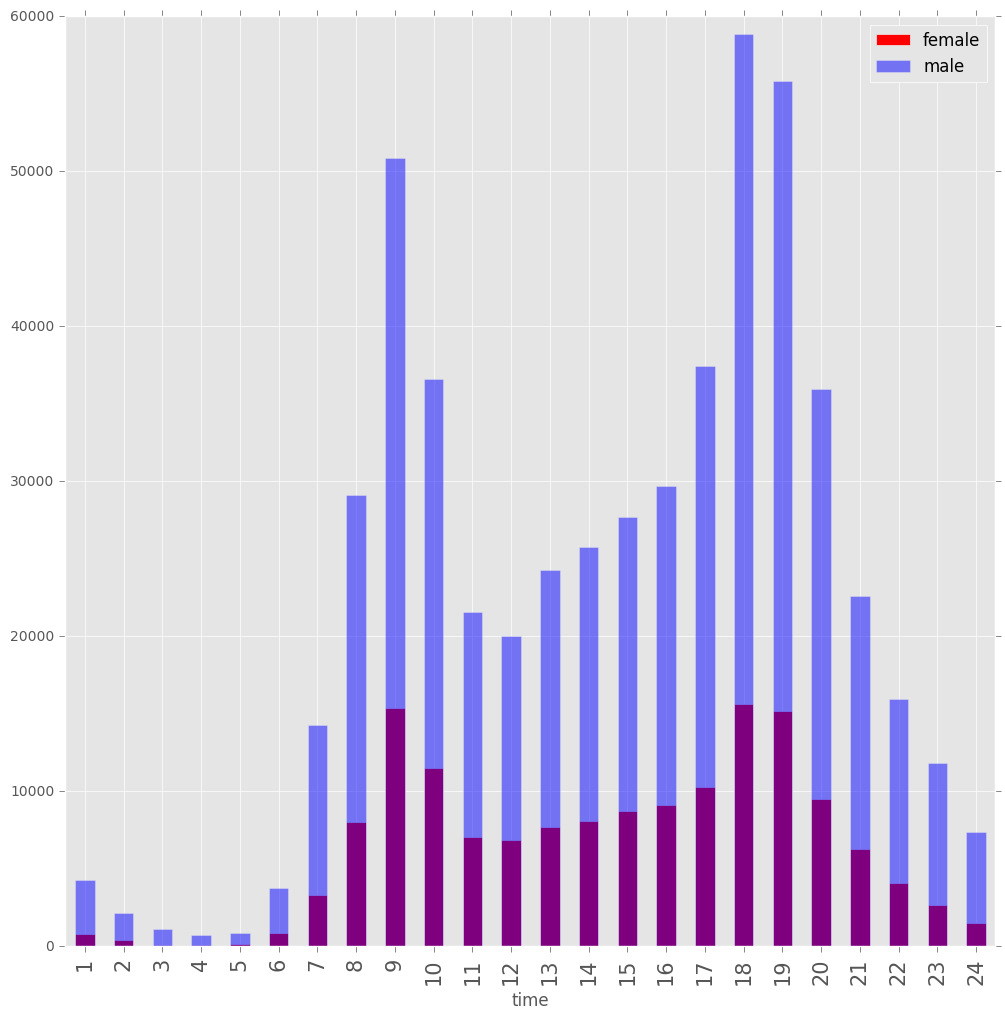

In [94]:
fig = pl.figure(figsize(12, 12))


norm_w = 1
((df['time'][df['Gender'] == 2].groupby([df['time'].dt.hour]).count()) / norm_w).plot(kind="bar", 
                                                                                         color='r', 
                                                                                         label='female')

norm_m = 1
ax = ((df['time'][df['Gender'] == 1].groupby([df['time'].dt.hour]).count()) / norm_m).plot(kind="bar", 
                                                                                              color='b', 
                                                                                              alpha=0.5,
                                                                                              label='male')

tmp = ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                               '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'], fontsize=15)
pl.legend()

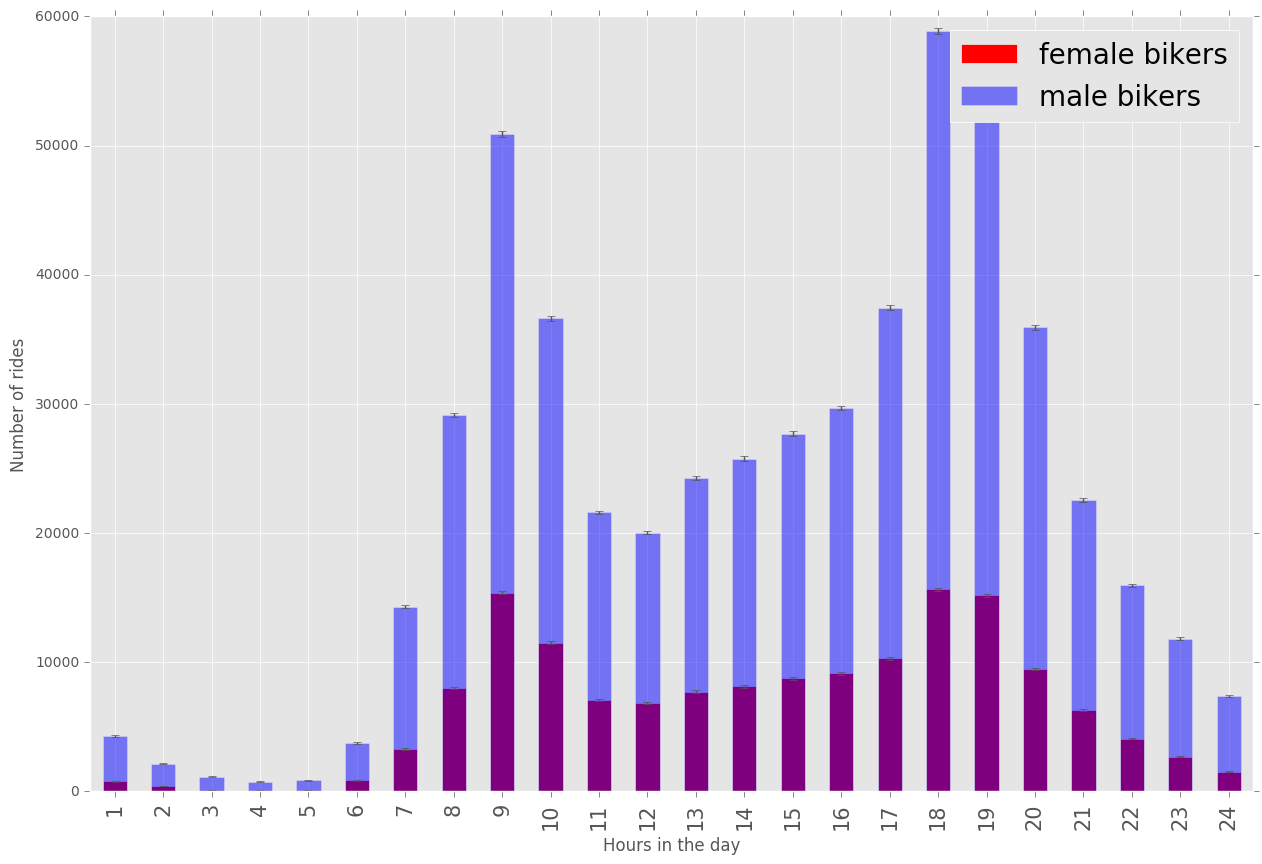

In [95]:
fig=pl.figure(figsize(15,10))

counts_w = df.time[df.Gender == 2].groupby([df.time.dt.hour]).count()
norm_w = 1
error_w = np.sqrt(counts_w)
ax=((counts_w) / norm_w).plot(kind="bar",color='r',  yerr=[
            ((error_w) / norm_w, (error_w) / norm_w)], label='female bikers')


counts_m = df.time[df.Gender==1].groupby([df.time.dt.hour]).count()
norm_m = 1
error_m=np.sqrt(counts_m)
((counts_m) / norm_m).plot(kind="bar", alpha=0.5, yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                           color='b', label='male bikers')
ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'], fontsize=15)
ax.set_ylabel ("Number of rides")
ax.set_xlabel ("Hours in the day")
pl.legend(['female bikers','male bikers'],fontsize=20)


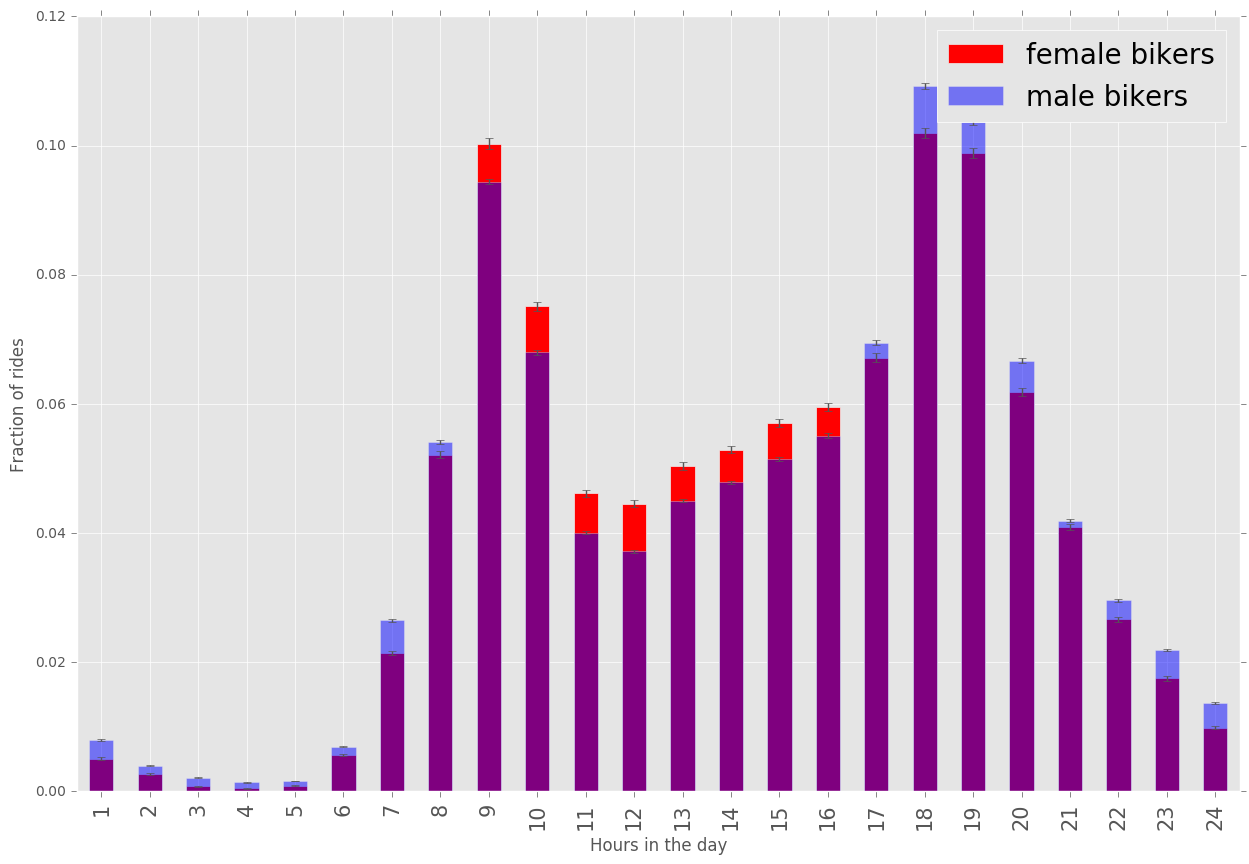

In [96]:
fig = pl.figure(figsize(15,10))

norm_w = counts_w.sum()
error_w = np.sqrt(counts_w)
((counts_w) / norm_w).plot(kind="bar", color='r',  
                           yerr=[((error_w) / norm_w, (error_w) / norm_w)], 
                           label='female bikers')

norm_m = counts_m.sum()
ax = ((counts_m) / norm_m).plot(kind="bar", alpha=0.5, 
                                yerr=[((error_m) / norm_m, (error_m) / norm_m)], 
                                color='b', label='male bikers')

ax.xaxis.set_ticklabels(['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
                        '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'], fontsize=15)
ax.set_ylabel ("Fraction of rides")
ax.set_xlabel ("Hours in the day")

pl.legend(['female bikers','male bikers'],fontsize=20)
